<a href="https://colab.research.google.com/github/Rajat-Karahe/NeuralNetwork_From_Scratch/blob/master/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm.notebook import tqdm

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green"])

In [0]:
np.random.seed(0)

In [21]:
data, labels = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


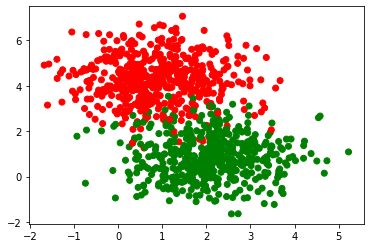

In [22]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [0]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

In [24]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


In [0]:
class FFNetwork:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    if initialise:
      np.random.seed(0)
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    loss = []
    
    for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      Y_pred = self.predict(X)
      loss.append(mean_squared_error(Y_pred, Y))
    
    plt.plot(loss)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

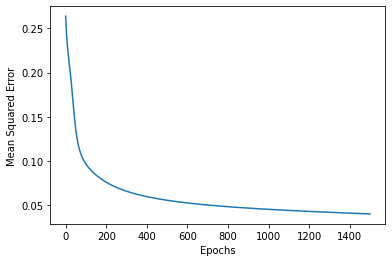

In [26]:
ffobject = FFNetwork()
ffobject.fit(X_train, Y_train, epochs=1500, learning_rate=0.5)